# UCI Machine Learning Repository - EEG Large_Database Dataset

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
import mne
import numpy as np
import re
import pywt
import seaborn as sns

# 0. Preprocesamiento

In [25]:
##Se obtienen las direcciones de todos los archivos contenidos en la carpeta de EEG_largeDataset
X = [os.path.join(r,file) for r,d,f in os.walk("D:\GitHub_Datasets\EEG_largeDataset") 
     for file in f]
#x_test = [os.path.join(r,file) for r,d,f in os.walk("D:\EEG_largeDataset\SMNI_CMI_TEST") 
 #    for file in f]
#print('x_train_size: %i \nx_test_size: '%len(x_train), len(x_test))
#print(len(x_train))
len(X)

1200

In [26]:
target_names = []
target_status = []
##Se hace un recorrido por todos las direcciones
for names in range(0, len(X)):
    arr_txt = X[names].split('\\') #Cada dirección se descompone de acuerdo al \\
    ##Para la cual se obtiene el nombre de cada archivo de texto y se remueve la terminación de .txt
    target_names.append(arr_txt[4].replace('.txt', '')) 
    ##Del nombre obtenido, se extrae la 4ta (0-3) letra que indica si la persona es alcoholica (a) o no (c)
    target_status.append(arr_txt[4][3])
print(len(target_names))
print(len(target_status))

1200
1200


In [27]:
Channels = []
Trials = []
file = []
##De una dirección, se abre un archivo, para extraer información estandar
with open(X[0], 'r') as reader:
    for line in reader.readlines(): #De un archivo se leen todas sus lineas
        if not(line.startswith('#')): #Si la línea empieza por el carácter # se obvia (información innecesaria)
            file.append(line)##Se almacena la información de la linea en file  
    for line in range(0, len(file)):#Para cada componente de la lista file
        separate_var = file[line].split()#Se descompone
        Channels.append(separate_var[1])#Se toma el segundo componente (nombre del canal)
        #Trials.append(separate_var[2])#Se toma el numero de la muestra (0-255)
#Channels.append('target')
print('Lenght Trials %i'%len(Trials))
print('Lenght Channels %i'%len(Channels))

Lenght Trials 0
Lenght Channels 16384


In [28]:
datamV = np.zeros([len(Channels), len(target_names)])  #Se crea un arreglo de ceros para almacenar la información del EEG
#datafull[:,0] = Trials
datamV.shape
#target_status = np.array(target_status)

(16384, 1200)

In [6]:
for docs in range (0, len(X)):#Se hace un recorrido por todas las direcciones, para abrir todos los archivos de texto
    mV = []
    file = []
    with open(X[docs], 'r') as reader:#Se abre el archivo de texto
            for line in reader.readlines():#Se leen todas sus lineas
                if not(line.startswith('#')):#Se obvian las lineas que inicien con el caracter #
                    file.append(line)#Aquellas lineas se almacenan en el arreglo file
            for line in range(0, len(file)):#De ese arreglo, se recorren todos sus componentes
                separate_var = file[line].split()#Cada componente se descompone
                #Para extraer el 4to (0-3) componente que corresponde a la respuesta eléctrica en mV
                mV.append(float(separate_var[3]))#Se almacenan todos los valores en el arreglo mV como flotante
                
            datamV[:, docs] = mV #Se almacenan todos los valores de mV en todas las filas de una columna
    reader.close()#Se cierra el documento

In [7]:
#datafull = np.c_[np.transpose(datafull), target_status]
#datafull = np.transpose(datafull)
#target_status

In [8]:
print(datamV.shape)
print(len(target_status))

(16384, 1200)
1200


In [9]:
#Se crea un dataframe con 256 datos * canal X examenes de EEG realizados, es decir (64*256, 20*60)
df = pd.DataFrame(data = datamV, index = Channels, columns = target_names)
df

,co2a0000364 (31),co2a0000364 (32),co2a0000364 (33),co2a0000364 (34),co2a0000364 (35),co2a0000364 (36),co2a0000364 (37),co2a0000364 (38),co2a0000364 (39),co2a0000364 (40),...,co2c0000347 (28),co2c0000347 (29),co2c0000347 (3),co2c0000347 (30),co2c0000347 (4),co2c0000347 (5),co2c0000347 (6),co2c0000347 (7),co2c0000347 (8),co2c0000347 (9)
FP1,3.459,-3.957,6.256,2.513,2.431,-2.787,4.333,1.740,3.367,2.797,...,-23.488,3.591,-3.479,1.373,0.488,0.834,-3.794,-1.282,16.235,-10.010
FP1,2.482,-2.981,6.256,0.559,5.361,-3.276,5.798,-0.214,1.902,2.797,...,-19.582,0.661,-5.920,-3.021,-1.465,0.834,5.971,-5.676,6.470,-9.521
FP1,1.506,0.437,5.768,-1.882,6.337,-4.252,6.287,-0.702,0.437,1.821,...,-16.164,-1.292,-8.362,-7.416,-1.465,1.322,9.389,-4.211,0.122,-3.662
FP1,1.506,3.367,4.791,-2.370,5.361,-5.229,5.310,0.275,-1.516,-0.621,...,-16.652,-2.268,-9.338,-9.369,0.488,1.811,5.971,3.113,1.587,3.174
FP1,3.459,4.344,3.815,-0.905,1.455,-6.205,4.333,2.716,-3.469,-3.062,...,-19.582,-2.268,-9.338,-8.881,3.418,2.299,-1.841,11.902,9.399,6.592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y,-7.589,-29.439,-23.946,-11.587,-7.721,-14.119,-6.541,-11.831,-12.085,-26.164,...,-13.214,5.371,-4.649,18.545,-11.688,-4.079,-3.540,3.825,-1.811,-28.310
Y,-9.542,-25.533,-22.481,-15.493,-5.768,-13.631,-11.912,-10.854,-11.597,-22.257,...,-10.284,3.418,-6.114,16.103,-13.153,-0.173,-1.587,5.778,0.142,-23.916
Y,-12.960,-20.650,-20.528,-18.422,-6.744,-12.166,-16.307,-7.924,-12.573,-19.328,...,-4.913,-2.441,-5.137,17.080,-16.571,2.268,0.854,7.731,1.607,-20.498
Y,-16.866,-17.232,-18.575,-19.887,-12.115,-12.166,-17.771,-4.995,-14.526,-18.351,...,-0.519,-9.766,-3.672,18.545,-21.454,3.245,2.808,7.243,1.119,-20.498


In [10]:
n_s = 256
minvalues = np.zeros([len(X), int(len(Channels)/n_s)])
maxvalues = np.zeros([len(X), int(len(Channels)/n_s)])
stdvalues = np.zeros([len(X), int(len(Channels)/n_s)])
skewvalues = np.zeros([len(X), int(len(Channels)/n_s)])
kurtvalues = np.zeros([len(X), int(len(Channels)/n_s)])
meanvalues = np.zeros([len(X), int(len(Channels)/n_s)])
medianvalues = np.zeros([len(X), int(len(Channels)/n_s)])
Chans = []
for each_channel in range(0, int(len(Channels)/n_s)):
    Chans.append(Channels[(each_channel*n_s)])
    for each_exam in range(0, len(target_status)):
        minvalues[each_exam, each_channel] = df[target_names[each_exam]][(each_channel*n_s):((each_channel+1)*n_s)].min()
        maxvalues[each_exam, each_channel] = df[target_names[each_exam]][(each_channel*n_s):((each_channel+1)*n_s)].max()
        stdvalues[each_exam, each_channel] = df[target_names[each_exam]][(each_channel*n_s):((each_channel+1)*n_s)].std()
        skewvalues[each_exam, each_channel] = df[target_names[each_exam]][(each_channel*n_s):((each_channel+1)*n_s)].skew()
        kurtvalues[each_exam, each_channel] = df[target_names[each_exam]][(each_channel*n_s):((each_channel+1)*n_s)].kurt()
        meanvalues[each_exam, each_channel] = df[target_names[each_exam]][(each_channel*n_s):((each_channel+1)*n_s)].mean()
        medianvalues[each_exam, each_channel] = df[target_names[each_exam]][(each_channel*n_s):((each_channel+1)*n_s)].median()
    
rangevalues = np.around((maxvalues - minvalues), decimals = 3)
Chans.append('target')

In [11]:
dfmax = pd.DataFrame(data = np.c_[maxvalues, target_status], index = target_names, columns = Chans)
dfrange = pd.DataFrame(data = np.c_[rangevalues, target_status], index = target_names, columns = Chans)
dfstd = pd.DataFrame(data = np.c_[stdvalues, target_status], index = target_names, columns = Chans)
dfskew = pd.DataFrame(data = np.c_[skewvalues, target_status], index = target_names, columns = Chans)
dfkurt = pd.DataFrame(data = np.c_[kurtvalues, target_status], index = target_names, columns = Chans)
dfmin = pd.DataFrame(data = np.c_[minvalues, target_status], index = target_names, columns = Chans)
dfmean = pd.DataFrame(data = np.c_[meanvalues, target_status], index = target_names, columns = Chans)
dfmedian = pd.DataFrame(data = np.c_[medianvalues, target_status], index = target_names, columns = Chans)

,FP1,FP2,F7,F8,AF1,AF2,FZ,F4,F3,FC6,...,PO8,FCZ,POZ,OZ,P2,P1,CPZ,nd,Y,target
co2a0000364 (31),67.424,63.293,27.72,21.881,42.114,34.261,23.376,20.559,22.512,3.815,...,12.207,9.735,3.591,11.648,0.132,1.424,0.142,66.477,6.083,a
co2a0000364 (32),41.941,41.3,13.367,23.285,24.75,23.855,13.062,12.075,11.688,6.307,...,19.847,5.198,12.136,18.911,6.663,6.378,3.845,41.372,2.299,a
co2a0000364 (33),45.319,47.099,16.215,25.726,23.173,22.99,12.39,11.678,11.159,4.944,...,11.556,5.931,5.544,9.084,4.985,5.839,5.137,43.976,6.327,a
co2a0000364 (34),48.411,47.557,9.969,22.247,24.76,22.176,12.095,12.543,11.434,3.052,...,9.186,5.798,9.247,7.365,5.849,6.012,2.299,46.855,4.038,a
co2a0000364 (35),58.584,67.678,24.923,29.256,36.051,37.567,19.236,21.708,16.612,4.466,...,12.421,6.348,5.768,10.763,2.757,4.14,1.719,57.78,10.345,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
co2c0000347 (5),118.51,96.802,49.306,48.848,64.26,57.17,32.725,36.489,38.9,27.018,...,23.56,10.966,19.175,20.315,18.84,17.487,10.59,22.146,34.007,c
co2c0000347 (6),135.854,121.134,48.95,65.806,74.748,69.041,45.349,50.924,44.749,25.706,...,3.469,26.418,3.855,3.347,2.716,4.74,1.984,4.781,13.55,c
co2c0000347 (7),24.597,18.402,17.497,16.663,19.033,19.389,13.845,14.13,12.187,10.366,...,19.897,9.542,14.801,14.893,13.916,17.171,10.539,16.429,18.473,c
co2c0000347 (8),35.278,34.149,36.784,20.365,29.104,25.004,13.489,14.811,22.319,11.648,...,22.166,6.449,20.203,18.178,12.583,15.452,8.586,17.405,39.693,c


# 1. Característica Principal : Valores Máximo 

c    600
a    600
Name: target, dtype: int64


<AxesSubplot:xlabel='target', ylabel='count'>

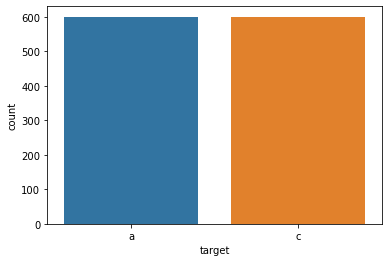

In [12]:
print(dfmax['target'].value_counts())
sns.countplot(data = dfmax, x = dfmax['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

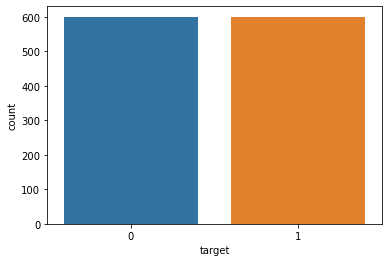

In [13]:
#Label encoding, convierte los valores de 'c' y 'a' en 1 y 0
from sklearn.preprocessing import LabelEncoder

Label_e = LabelEncoder()
dfmax.iloc[:, 64] = Label_e.fit_transform(dfmax.iloc[:,64].values)
 
sns.countplot(data = dfmax, x = dfmax['target'])

## PCA

In [14]:
X_1 = dfmax.drop('target', axis = 1)
y_1 = dfmax['target']

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_1)
X_1sc = scaler.transform(X_1)

<function matplotlib.pyplot.show(close=None, block=None)>

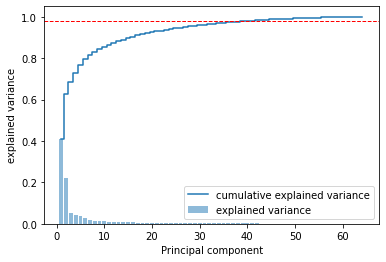

In [29]:
cov_mat = np.cov(X_1sc.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1, 65), var_exp, alpha = 0.5, align = 'center', label = 'explained variance')
plt.step(range(1, 65), cum_var_exp, where = 'mid', label = 'cumulative explained variance')
plt.axhline(y = 0.98, color = 'r', linestyle = '--', linewidth = 1)
plt.ylabel('explained variance')
plt.xlabel('Principal component')
plt.legend(loc = 'best')
plt.show

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 35)
pca.fit(X_1)
X_1pca = pca.transform(X_1)
X_1pca.shape

(1200, 35)

## GridSearchCV

In [169]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [170]:
#Pipeline para el Clasificador con ANN
pipe_mlp = Pipeline([('scl', StandardScaler()),
                   ('clf', MLPClassifier(random_state = 1))])

#Rango de variables para alpha, y la razón de aprendizaje
param_range = [0.00001, 0.0001, 0.001, 0.01, 0.1]
#Lista de funciones de activación
param_activation = ['identity', 'tanh', 'logistic', 'relu']
#Lista de capas ocultas (entre 5 a 20 para no saturar el GridSearchCV haciendo el estudio con muchas capas ocultas)
param_hidden_layer_sizes = list(range(5, 20))

#Se hace la grilla del MPLClassifier con los rangos de parametros establecidos anteriormente
param_grid = [{'clf__hidden_layer_sizes': param_hidden_layer_sizes,
              'clf__activation': param_activation, 
              'clf__alpha': param_range,
              'clf__solver': ['adam'],
              'clf__max_iter': [5000]},
              {'clf__hidden_layer_sizes': param_hidden_layer_sizes,
              'clf__activation': param_activation, 
              'clf__alpha': param_range,
              'clf__solver': ['lbfgs'],
              'clf__max_iter': [5000]},
              {'clf__hidden_layer_sizes': param_hidden_layer_sizes,
              'clf__activation': param_activation, 
              'clf__alpha': param_range,
              'clf__solver': ['sgd'],
              'clf__learning_rate_init': param_range,
              'clf__max_iter': [5000]}]

In [171]:
#Se realiza la busqueda para la mejor combinación de parametros de acuerdo a una validación cruzada de 5, teniendo
#como métrica la exactitud de la clasificación
gs = GridSearchCV(estimator = pipe_mlp, 
                  param_grid = param_grid,  
                  scoring = 'accuracy', 
                  cv = 5,
                  n_jobs = -1)

In [71]:
gs = gs.fit(X_1pca, y_1)
print(gs.best_score_)
print(gs.best_params_)

0.8416666666666666
{'clf__activation': 'relu', 'clf__alpha': 0.1, 'clf__hidden_layer_sizes': 17, 'clf__max_iter': 5000, 'clf__solver': 'lbfgs'}


In [172]:
from sklearn.svm import SVC
#Se realiza un pipeline para el escalamiento de los datos y el SVC, 
pipe_svm = Pipeline([('scl', StandardScaler()),
                   ('clf1', SVC(random_state = 1))])
#Rango de valores que podría tomar el indice de regularización C
param_range1 = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
#Se crea la grilla para determinar los mejores parametros para la clasificacion usando SVM con kernel lineal
param_grid1 = [{'clf1__C': param_range1, 
                'clf1__kernel': ['linear']}]

In [173]:
#Se realiza la busqueda de parametros con el GridSearchCV teniendo en cuenta la exactitud con un cv = 5
gs1 = GridSearchCV(estimator = pipe_svm, 
                  param_grid = param_grid1, 
                  scoring = 'accuracy', 
                  cv = 5,
                  n_jobs = -1)

In [23]:
gs1 = gs1.fit(X_1pca, y_1)
print(gs1.best_score_)
print(gs1.best_params_)

0.7116666666666667
{'clf1__C': 100.0, 'clf1__kernel': 'linear'}


In [182]:
gamma_range = [0.00001, 0.0001, 0.001, 0.01, 0.1, 'auto', 'escale']
param_grid2 = [{'clf1__C': param_range1, 
                'clf1__kernel': ['rbf'],
                'clf1__gamma': gamma_range},
               
               {'clf1__C': param_range1, 
                'clf1__kernel': ['poly'],
                'clf1__gamma': gamma_range},
               
               {'clf1__C': param_range1, 
                'clf1__kernel': ['sigmoid'],
                'clf1__gamma': gamma_range}]

In [183]:
gs2 = GridSearchCV(estimator = pipe_svm, 
                  param_grid = param_grid2, 
                  scoring = 'accuracy', 
                  cv = 5,
                  n_jobs = -1)


In [26]:
gs2 = gs2.fit(X_1pca, y_1)
print(gs2.best_score_)
print(gs2.best_params_)

0.8341666666666667
{'clf1__C': 10.0, 'clf1__gamma': 'auto', 'clf1__kernel': 'rbf'}


## Final models

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

res = train_test_split(X_1pca, y_1, test_size = 0.2, random_state = 1)
train_data, test_data, train_labels, test_labels = res

In [185]:
mlp_final = Pipeline([('scl', StandardScaler()),
                           ('clf_final', MLPClassifier(random_state = 1,
                                                       hidden_layer_sizes = (17,),
                                                       activation = 'relu',
                                                       solver = 'lbfgs',
                                                       alpha = 0.1,
                                                       max_iter = 1000))])

mlp_final.fit(train_data, train_labels)

Pipeline(steps=[('scl', StandardScaler()),
                ('clf_final',
                 MLPClassifier(alpha=0.1, hidden_layer_sizes=(17,),
                               max_iter=1000, random_state=1,
                               solver='lbfgs'))])

In [186]:
svm_final = Pipeline([('scl', StandardScaler()),
                      ('clf1_final', SVC(random_state = 1,
                                         C = 10.0,
                                         gamma = 'auto',
                                         kernel = 'rbf'))])
svm_final.fit(train_data, train_labels)

Pipeline(steps=[('scl', StandardScaler()),
                ('clf1_final', SVC(C=10.0, gamma='auto', random_state=1))])

## Metrics

In [187]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
cvs = cross_val_score


 Mean Accuracy
 0.8416666666666666

 Mean F1_macro
 0.8414540173902003

 Mean Accuracy
 0.8435712507536133

 Mean F1_macro
 0.8383333333333333


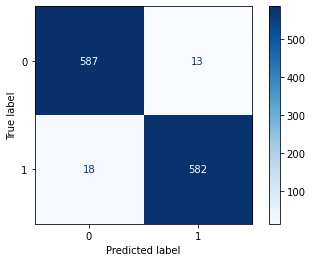

<Figure size 432x288 with 0 Axes>

In [225]:
cvsacc = cvs(mlp_final, X_1pca, y_1, cv = 5, scoring = 'accuracy')
cvsf1macro = cvs(mlp_final, X_1pca, y_1, cv = 5, scoring = 'f1_macro')
cvsprecision = cvs(mlp_final, X_1pca, y_1, cv = 5, scoring = 'precision')
cvsrecall = cvs(mlp_final, X_1pca, y_1, cv = 5, scoring = 'recall')

print('\n \033[1m' + 'Mean Accuracy' + '\033[0m\n', np.mean(cvsacc))
print('\n \033[1m' + 'Mean F1_macro' + '\033[0m\n', np.mean(cvsf1macro))
print('\n \033[1m' + 'Mean Accuracy' + '\033[0m\n', np.mean(cvsprecision))
print('\n \033[1m' + 'Mean F1_macro' + '\033[0m\n', np.mean(cvsrecall))

plot_confusion_matrix(mlp_final, X_1pca, y_1, cmap = 'Blues')
plt.show()
plt.savefig('MlpMax.pdf')


 Mean Accuracy
 0.8316666666666667

 Mean F1_macro
 0.8314135318943585

 Mean Precision
 0.8181209352194732

 Mean Recall
 0.8549999999999999


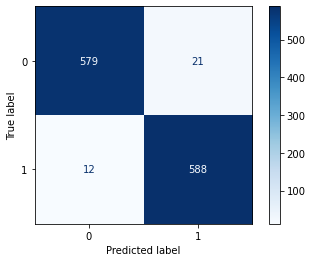

<Figure size 432x288 with 0 Axes>

In [226]:
cvsacc_1 = cvs(svm_final, X_1pca, y_1, cv = 5, scoring = 'accuracy')
cvsf1macro_1 = cvs(svm_final, X_1pca, y_1, cv = 5, scoring = 'f1_macro')
cvsprecision_1 = cvs(svm_final, X_1pca, y_1, cv = 5, scoring = 'precision')
cvsrecall_1 = cvs(svm_final, X_1pca, y_1, cv = 5, scoring = 'recall')


print('\n \033[1m' + 'Mean Accuracy' + '\033[0m\n', np.mean(cvsacc_1))
print('\n \033[1m' + 'Mean F1_macro' + '\033[0m\n', np.mean(cvsf1macro_1))
print('\n \033[1m' + 'Mean Precision' + '\033[0m\n', np.mean(cvsprecision_1))
print('\n \033[1m' + 'Mean Recall' + '\033[0m\n', np.mean(cvsrecall_1))


plot_confusion_matrix(svm_final, X_1pca, y_1, cmap = 'Blues')
plt.show()
plt.savefig('SvmMax.pdf')

# 2. Característica Principal : Rango

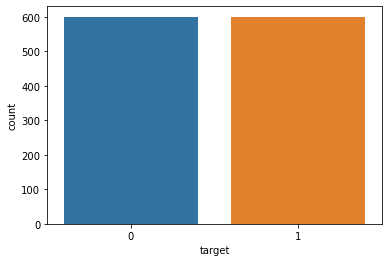

In [190]:
Label_e = LabelEncoder()
dfrange.iloc[:, 64] = Label_e.fit_transform(dfrange.iloc[:,64].values)
sns.countplot(data = dfrange, x = dfrange['target'])

X_2 = dfrange.drop('target', axis = 1)
y_2 = dfrange['target']

## PCA 

In [191]:
scaler.fit(X_2)
X_2sc = scaler.transform(X_2)

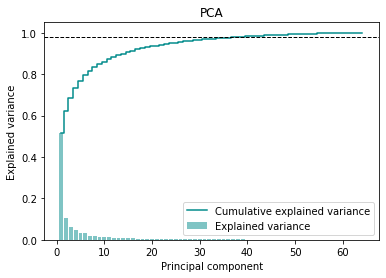

In [192]:
cov_mat2 = np.cov(X_2sc.T)
eigen_vals2, eigen_vecs2 = np.linalg.eig(cov_mat2)
tot2 = sum(eigen_vals2)
var_exp2 = [(i/tot2) for i in sorted(eigen_vals2, reverse = True)]
cum_var_exp2 = np.cumsum(var_exp2)
plt.bar(range(1, 65), var_exp2, alpha = 0.5, align = 'center', label = 'Explained variance', color = 'darkcyan')
plt.step(range(1, 65), cum_var_exp2, where = 'mid', label = 'Cumulative explained variance', color = 'darkcyan')
plt.axhline(y = 0.98, color = 'black', linestyle = '--', linewidth = 1)
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.title('PCA')
plt.legend(loc = 'best')
plt.show
plt.savefig('PCA.pdf')

In [193]:
pca2 = PCA(n_components = 35)
pca2.fit(X_2)
X_2pca = pca2.transform(X_2)
X_2pca.shape

(1200, 35)

In [194]:
res2 = train_test_split(X_2pca, y_2, test_size = 0.2, random_state = 1)
train2_data, test2_data, train2_labels, test2_labels = res2

## GridSearchCV

In [61]:
gs_r = gs.fit(X_2pca, y_2)
print(gs_r.best_score_)
print(gs_r.best_params_)

0.9308333333333334
{'clf__activation': 'relu', 'clf__alpha': 0.1, 'clf__hidden_layer_sizes': 18, 'clf__max_iter': 1000, 'clf__solver': 'lbfgs'}


In [62]:
gs_r1 = gs1.fit(X_2pca, y_2)
print(gs_r1.best_score_)
print(gs_r1.best_params_)

0.8216666666666667
{'clf1__C': 100.0, 'clf1__kernel': 'linear'}


In [63]:
gs_r2 = gs2.fit(X_2pca, y_2)
print(gs_r2.best_score_)
print(gs_r2.best_params_)

0.9233333333333332
{'clf1__C': 10.0, 'clf1__gamma': 'auto', 'clf1__kernel': 'rbf'}


## Final Models

In [195]:
mlp_final2 = Pipeline([('scl', StandardScaler()),
                           ('clf_final', MLPClassifier(random_state = 1,
                                                       hidden_layer_sizes = (18,),
                                                       activation = 'relu',
                                                       solver = 'lbfgs',
                                                       alpha = 0.1,
                                                       max_iter = 1000))])
mlp_final2.fit(train2_data, train2_labels)

Pipeline(steps=[('scl', StandardScaler()),
                ('clf_final',
                 MLPClassifier(alpha=0.1, hidden_layer_sizes=(18,),
                               max_iter=1000, random_state=1,
                               solver='lbfgs'))])

In [196]:
svm_final2 = Pipeline([('scl', StandardScaler()),
                      ('clf1_final', SVC(random_state = 1,
                                         C = 10.0,
                                         gamma = 'auto',
                                         kernel = 'rbf'))])
svm_final2.fit(train2_data, train2_labels)

Pipeline(steps=[('scl', StandardScaler()),
                ('clf1_final', SVC(C=10.0, gamma='auto', random_state=1))])

## Metrics


 Mean Accuracy
 0.9274999999999999

 Mean F1_macro
 0.927490432539068

 Mean Precision
 0.923785557876467

 Mean Recall
 0.9316666666666666


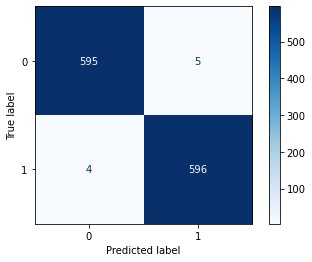

<Figure size 432x288 with 0 Axes>

In [227]:
cvsacc2 = cvs(mlp_final2, X_2pca, y_2, cv = 5, scoring = 'accuracy')
cvsf1macro2 = cvs(mlp_final2, X_2pca, y_2, cv = 5, scoring = 'f1_macro')
cvsprecision2 = cvs(mlp_final2, X_2pca, y_2, cv = 5, scoring = 'precision')
cvsrecall2 = cvs(mlp_final2, X_2pca, y_2, cv = 5, scoring = 'recall')

print('\n \033[1m' + 'Mean Accuracy' + '\033[0m\n', np.mean(cvsacc2))
print('\n \033[1m' + 'Mean F1_macro' + '\033[0m\n', np.mean(cvsf1macro2))
print('\n \033[1m' + 'Mean Precision' + '\033[0m\n', np.mean(cvsprecision2))
print('\n \033[1m' + 'Mean Recall' + '\033[0m\n', np.mean(cvsrecall2))

plot_confusion_matrix(mlp_final2, X_2pca, y_2, cmap = 'Blues')
plt.show()
plt.savefig('Mlprange.pdf')


 Mean Accuracy
 0.9225

 Mean F1_macro
 0.9224062568603133

 Mean Precision
 0.9134806103232839

 Mean Recall
 0.9350000000000002


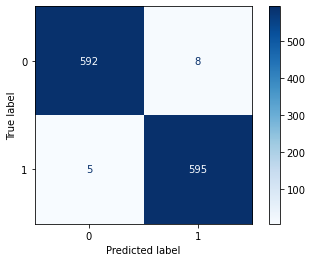

<Figure size 432x288 with 0 Axes>

In [228]:
cvsacc2_1 = cvs(svm_final2, X_2pca, y_2, cv = 5, scoring = 'accuracy')
cvsf1macro2_1 = cvs(svm_final2, X_2pca, y_2, cv = 5, scoring = 'f1_macro')
cvsprecision2_1 = cvs(svm_final2, X_2pca, y_2, cv = 5, scoring = 'precision')
cvsrecall2_1 = cvs(svm_final2, X_2pca, y_2, cv = 5, scoring = 'recall')



print('\n \033[1m' + 'Mean Accuracy' + '\033[0m\n', np.mean(cvsacc2_1))
print('\n \033[1m' + 'Mean F1_macro' + '\033[0m\n', np.mean(cvsf1macro2_1))
print('\n \033[1m' + 'Mean Precision' + '\033[0m\n', np.mean(cvsprecision2_1))
print('\n \033[1m' + 'Mean Recall' + '\033[0m\n', np.mean(cvsrecall2_1))

plot_confusion_matrix(svm_final2, X_2pca, y_2, cmap = 'Blues')
plt.show()
plt.savefig('Svmrange.pdf')

# 3. Característica Principal : Mínimo

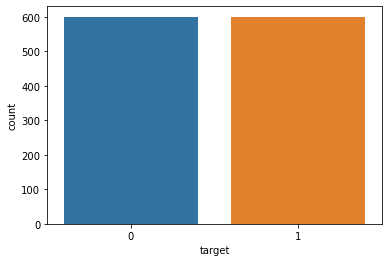

In [199]:
Label_e = LabelEncoder()
dfmin.iloc[:, 64] = Label_e.fit_transform(dfmin.iloc[:,64].values)
sns.countplot(data = dfmin, x = dfmin['target'])

X_3 = dfmin.drop('target', axis = 1)
y_3 = dfmin['target']

## PCA

In [200]:
scaler.fit(X_3)
X_3sc = scaler.transform(X_3)

<function matplotlib.pyplot.show(close=None, block=None)>

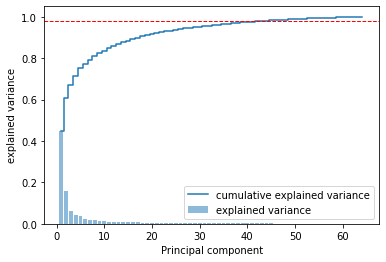

In [201]:
cov_mat3 = np.cov(X_3sc.T)
eigen_vals3, eigen_vecs3 = np.linalg.eig(cov_mat3)
tot3 = sum(eigen_vals3)
var_exp3 = [(i/tot3) for i in sorted(eigen_vals3, reverse = True)]
cum_var_exp3 = np.cumsum(var_exp3)
plt.bar(range(1, 65), var_exp3, alpha = 0.5, align = 'center', label = 'explained variance')
plt.step(range(1, 65), cum_var_exp3, where = 'mid', label = 'cumulative explained variance')
plt.axhline(y = 0.98, color = 'r', linestyle = '--', linewidth = 1)
plt.ylabel('explained variance')
plt.xlabel('Principal component')
plt.legend(loc = 'best')
plt.show

In [202]:
pca3 = PCA(n_components = 35)
pca3.fit(X_3)
X_3pca = pca3.transform(X_3)
X_3pca.shape

(1200, 35)

In [203]:
res3 = train_test_split(X_3pca, y_3, test_size = 0.2, random_state = 1)
train3_data, test3_data, train3_labels, test3_labels = res3

## GridSearchCV

In [92]:
gs_min = gs.fit(X_3pca, y_3)
print(gs_min.best_score_)
print(gs_min.best_params_)

0.8391666666666666
{'clf__activation': 'relu', 'clf__alpha': 0.001, 'clf__hidden_layer_sizes': 17, 'clf__max_iter': 1000, 'clf__solver': 'adam'}


In [93]:
gs_min1 = gs1.fit(X_3pca, y_3)
print(gs_min1.best_score_)
print(gs_min1.best_params_)

0.755
{'clf1__C': 0.1, 'clf1__kernel': 'linear'}


In [94]:
gs_min2 = gs2.fit(X_3pca, y_3)
print(gs_min2.best_score_)
print(gs_min2.best_params_)

0.8416666666666666
{'clf1__C': 10.0, 'clf1__gamma': 'auto', 'clf1__kernel': 'rbf'}


## Final Models

In [204]:
mlp_final3 = Pipeline([('scl', StandardScaler()),
                           ('clf_final', MLPClassifier(random_state = 1,
                                                       hidden_layer_sizes = (17,),
                                                       activation = 'relu',
                                                       solver = 'adam',
                                                       alpha = 0.001,
                                                       max_iter = 1000))])
mlp_final3.fit(train3_data, train3_labels)

Pipeline(steps=[('scl', StandardScaler()),
                ('clf_final',
                 MLPClassifier(alpha=0.001, hidden_layer_sizes=(17,),
                               max_iter=1000, random_state=1))])

In [205]:
svm_final3 = Pipeline([('scl', StandardScaler()),
                      ('clf1_final', SVC(random_state = 1,
                                         C = 10.0,
                                         gamma = 'auto',
                                         kernel = 'rbf'))])
svm_final3.fit(train3_data, train3_labels)

Pipeline(steps=[('scl', StandardScaler()),
                ('clf1_final', SVC(C=10.0, gamma='auto', random_state=1))])

## Metrics


 Mean Accuracy
 0.8325000000000001

 Mean F1_macro
 0.8324195719890204

 Mean Precision
 0.8334165878675123

 Mean Recall
 0.8316666666666667


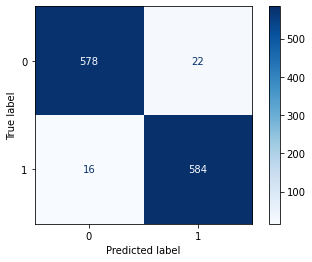

<Figure size 432x288 with 0 Axes>

In [232]:
cvsacc3 = cvs(mlp_final3, X_3pca, y_3, cv = 5, scoring = 'accuracy')
cvsf1macro3 = cvs(mlp_final3, X_3pca, y_3, cv = 5, scoring = 'f1_macro')
cvsprecision3 = cvs(mlp_final3, X_3pca, y_3, cv = 5, scoring = 'precision')
cvsrecall3 = cvs(mlp_final3, X_3pca, y_3, cv = 5, scoring = 'recall')

print('\n \033[1m' + 'Mean Accuracy' + '\033[0m\n', np.mean(cvsacc3))
print('\n \033[1m' + 'Mean F1_macro' + '\033[0m\n', np.mean(cvsf1macro3))
print('\n \033[1m' + 'Mean Precision' + '\033[0m\n', np.mean(cvsprecision3))
print('\n \033[1m' + 'Mean Recall' + '\033[0m\n', np.mean(cvsrecall3))

plot_confusion_matrix(mlp_final3, X_3pca, y_3, cmap = 'Blues')
plt.show()
plt.savefig('Mlpmin.pdf')


 Mean Accuracy
 0.8391666666666666

 Mean F1_macro
 0.8389266475329815

 Mean Precision
 0.8306899125313448

 Mean Recall
 0.8549999999999999


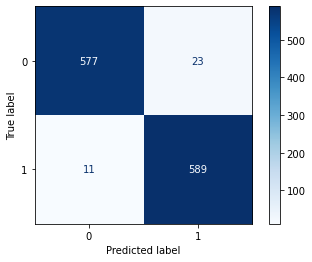

<Figure size 432x288 with 0 Axes>

In [234]:
cvsacc3_1 = cvs(svm_final3, X_3pca, y_3, cv = 5, scoring = 'accuracy')
cvsf1macro3_1 = cvs(svm_final3, X_3pca, y_3, cv = 5, scoring = 'f1_macro')
cvsprecision3_1 = cvs(svm_final3, X_3pca, y_3, cv = 5, scoring = 'precision')
cvsrecall3_1 = cvs(svm_final3, X_3pca, y_3, cv = 5, scoring = 'recall')


print('\n \033[1m' + 'Mean Accuracy' + '\033[0m\n', np.mean(cvsacc3_1))
print('\n \033[1m' + 'Mean F1_macro' + '\033[0m\n', np.mean(cvsf1macro3_1))
print('\n \033[1m' + 'Mean Precision' + '\033[0m\n', np.mean(cvsprecision3_1))
print('\n \033[1m' + 'Mean Recall' + '\033[0m\n', np.mean(cvsrecall3_1))

plot_confusion_matrix(svm_final3, X_3pca, y_3, cmap = 'Blues')
plt.show()
plt.savefig('Svmmin')

## 4. Característica Principal : Desviación Estandar

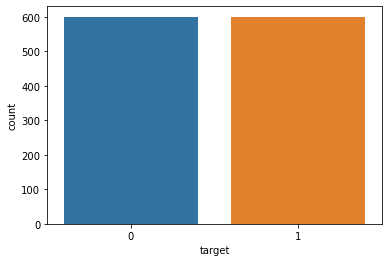

In [208]:
Label_e = LabelEncoder()
dfstd.iloc[:, 64] = Label_e.fit_transform(dfstd.iloc[:,64].values)
sns.countplot(data = dfstd, x = dfstd['target'])

X_4 = dfstd.drop('target', axis = 1)
y_4 = dfstd['target']

## PCA

In [209]:
scaler.fit(X_4)
X_4sc = scaler.transform(X_4)

<function matplotlib.pyplot.show(close=None, block=None)>

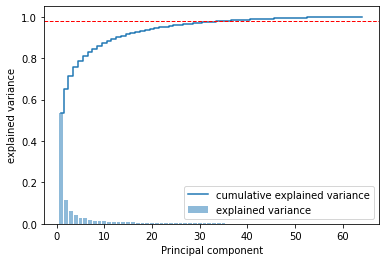

In [210]:
cov_mat4 = np.cov(X_4sc.T)
eigen_vals4, eigen_vecs4 = np.linalg.eig(cov_mat4)
tot4 = sum(eigen_vals4)
var_exp4 = [(i/tot4) for i in sorted(eigen_vals4, reverse = True)]
cum_var_exp4 = np.cumsum(var_exp4)
plt.bar(range(1, 65), var_exp4, alpha = 0.5, align = 'center', label = 'explained variance')
plt.step(range(1, 65), cum_var_exp4, where = 'mid', label = 'cumulative explained variance')
plt.axhline(y = 0.98, color = 'r', linestyle = '--', linewidth = 1)
plt.ylabel('explained variance')
plt.xlabel('Principal component')
plt.legend(loc = 'best')
plt.show

In [211]:
pca4 = PCA(n_components = 35)
pca4.fit(X_4)
X_4pca = pca3.transform(X_4)
X_4pca.shape

(1200, 35)

In [212]:
res4 = train_test_split(X_4pca, y_4, test_size = 0.2, random_state = 1)
train4_data, test4_data, train4_labels, test4_labels = res4

## GridSearchCV

In [105]:
gs_std = gs.fit(X_4pca, y_4)
print(gs_std.best_score_)
print(gs_std.best_params_)

0.9108333333333334
{'clf__activation': 'relu', 'clf__alpha': 0.1, 'clf__hidden_layer_sizes': 18, 'clf__max_iter': 1000, 'clf__solver': 'lbfgs'}


In [106]:
gs_std1 = gs1.fit(X_4pca, y_4)
print(gs_std1.best_score_)
print(gs_std1.best_params_)

0.7908333333333333
{'clf1__C': 100.0, 'clf1__kernel': 'linear'}


In [107]:
gs_std2 = gs2.fit(X_4pca, y_4)
print(gs_std2.best_score_)
print(gs_std2.best_params_)

0.925
{'clf1__C': 100.0, 'clf1__gamma': 'auto', 'clf1__kernel': 'rbf'}


## Final Models

In [213]:
mlp_final4 = Pipeline([('scl', StandardScaler()),
                           ('clf_final', MLPClassifier(random_state = 1,
                                                       hidden_layer_sizes = (18,),
                                                       activation = 'relu',
                                                       solver = 'lbfgs',
                                                       alpha = 0.1,
                                                       max_iter = 1000))])
mlp_final4.fit(train4_data, train4_labels)

Pipeline(steps=[('scl', StandardScaler()),
                ('clf_final',
                 MLPClassifier(alpha=0.1, hidden_layer_sizes=(18,),
                               max_iter=1000, random_state=1,
                               solver='lbfgs'))])

In [214]:
svm_final4 = Pipeline([('scl', StandardScaler()),
                      ('clf1_final', SVC(random_state = 1,
                                         C = 100.0,
                                         gamma = 'auto',
                                         kernel = 'rbf'))])
svm_final4.fit(train4_data, train4_labels)

Pipeline(steps=[('scl', StandardScaler()),
                ('clf1_final', SVC(C=100.0, gamma='auto', random_state=1))])

## Metrics


 Mean Accuracy
 0.9125

 Mean F1_macro
 0.9123013070476154

 Mean Precision
 0.911463051311604

 Mean Recall
 0.9183333333333333


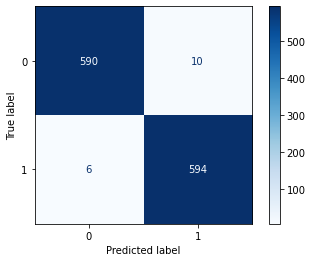

<Figure size 432x288 with 0 Axes>

In [231]:
cvsacc4 = cvs(mlp_final4, X_4pca, y_4, cv = 5, scoring = 'accuracy')
cvsf1macro4 = cvs(mlp_final4, X_4pca, y_4, cv = 5, scoring = 'f1_macro')
cvsprecision4 = cvs(mlp_final4, X_4pca, y_4, cv = 5, scoring = 'precision')
cvsrecall4 = cvs(mlp_final4, X_4pca, y_4, cv = 5, scoring = 'recall')

print('\n \033[1m' + 'Mean Accuracy' + '\033[0m\n', np.mean(cvsacc4))
print('\n \033[1m' + 'Mean F1_macro' + '\033[0m\n', np.mean(cvsf1macro4))
print('\n \033[1m' + 'Mean Precision' + '\033[0m\n', np.mean(cvsprecision4))
print('\n \033[1m' + 'Mean Recall' + '\033[0m\n', np.mean(cvsrecall4))


plot_confusion_matrix(mlp_final4, X_4pca, y_4, cmap = 'Blues')
plt.show()
plt.savefig('Mlpstd.pdf')


 Mean Accuracy
 0.9233333333333335

 Mean F1_macro
 0.9232100338011403

 Mean Precision
 0.922289483238889

 Mean Recall
 0.9283333333333333


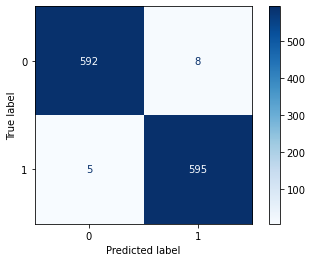

<Figure size 432x288 with 0 Axes>

In [230]:
cvsacc4_1 = cvs(svm_final4, X_4pca, y_4, cv = 5, scoring = 'accuracy')
cvsf1macro4_1 = cvs(svm_final4, X_4pca, y_4, cv = 5, scoring = 'f1_macro')
cvsprecision4_1 = cvs(svm_final4, X_4pca, y_4, cv = 5, scoring = 'precision')
cvsrecall4_1 = cvs(svm_final4, X_4pca, y_4, cv = 5, scoring = 'recall')

print('\n \033[1m' + 'Mean Accuracy' + '\033[0m\n', np.mean(cvsacc4_1))
print('\n \033[1m' + 'Mean F1_macro' + '\033[0m\n', np.mean(cvsf1macro4_1))
print('\n \033[1m' + 'Mean Precision' + '\033[0m\n', np.mean(cvsprecision4_1))
print('\n \033[1m' + 'Mean Recall' + '\033[0m\n', np.mean(cvsrecall4_1))


plot_confusion_matrix(svm_final4, X_4pca, y_4, cmap = 'Blues')
plt.show()
plt.savefig('Svmstd.pdf')

44009.879277 44009.879277


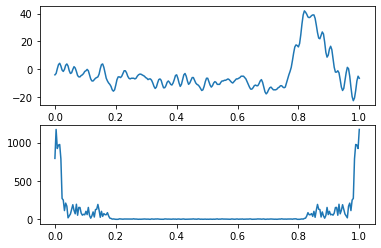

In [55]:
from scipy.fft import fft,fftshift

signal = df['co2a0000364 (32)']
chan = 1
signalchan1= signal[(chan-1)*256:(256*chan)]
N = len(signalchan1)
#n = np.arange(1, 15, 1)
#X1 = (1.3**n)+5
#N = len(X1)
t = np.linspace(0, 1, N)
X = np.fft.fft(signalchan1)
X_mag = np.abs(X)

fig, [ax1, ax2] = plt.subplots(nrows = 2, ncols = 1)
ax1.plot(t, signalchan1, '-')
ax2.plot(t, X_mag, '-')
plt.show
f = np.square(X_mag)
d = np.square(np.abs(signalchan1))
print((1/N)*np.sum(f), np.sum(d))

In [59]:
signal = df['co2a0000364 (1)']
chan = 40
signalchan1= signal[(chan-1)*256:(256*chan)]
CD1, CD2, CD3, CD4, CD5 = pywt.wavedec(signalchan1, 'haar', level = 4, mode = 'periodic')
print(len(CD1),len(CD2),len(CD3),len(CD4),len(CD5))

16 16 32 64 128


In [61]:
?pywt.wavedec
#print(signal)

In [62]:


cA, cD = pywt.dwt(signalchan1, 'haar')

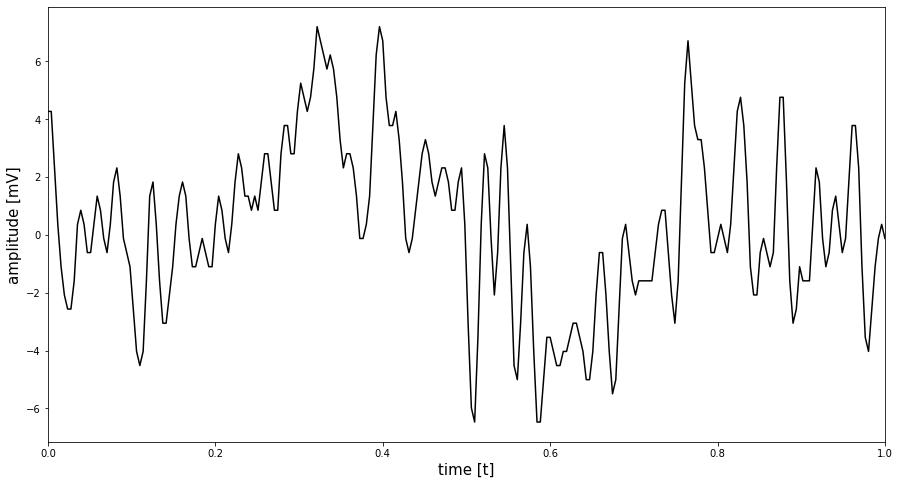

In [70]:
plt.figure(figsize=(15,8))
t = np.linspace(0, 1, 256)
plt.plot(t, signalchan1, color = 'black')
plt.xlim(0, 1)
plt.xlabel('time [t]', size = 15)
plt.ylabel('amplitude [mV]', size = 15)
plt.savefig('signal.pdf')

In [ ]:
wp = pywt.WaveletPacket(data = signal, wavelet = 'db1', mode = 'symmetric')
wp['ad'].maxlevel

In [ ]:
cAchan1, cDchan1 = pywt.dwt(signalchan1, 'haar')
t = np.linspace(0, 1, 256)
twv = np.linspace(0 ,1, 128)

plt.figure(figsize=(15,8))
plt.plot(t, signalchan1, label = 'original')
plt.plot(twv, cAchan1, label= 'cA coef')
plt.plot(twv, cDchan1, label= 'cD coef')
plt.legend()